In [ ]:
# Required Packages and Functions

In [6]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import numpy as np
import statsmodels as sm

# Time Series Analysis Background Knowledge

In [8]:
# The Lynx Dataset and Time Series Vectors and Lags
# Importing the data with pandas and using its 'year' column for the index
# Make sure that LYNXdata.csv is in the same folder as this python notebook
mylynx_df = pd.read_csv("LYNXdata.csv", header = 0,
                     names = ['year', 'trappings'],
                     index_col = 0)

In [3]:
# Checking the data - Note the index/ time stamp 'year'
mylynx_df.trappings

year
1821     269
1822     321
1823     585
1824     871
1825    1475
        ... 
1930     662
1931    1000
1932    1590
1933    2657
1934    3396
Name: trappings, Length: 114, dtype: int64

In [4]:
# Data is still a DataFrame (pandas)
type(mylynx_df)

pandas.core.frame.DataFrame

In [5]:
# Converting the DataFrame into a Series object
# Reusing existing index - the new object inherits the index
# Basically extracting the 'trappings' column from my data
mylynxts_simple = mylynx_df['trappings']
type(mylynxts_simple)

pandas.core.series.Series

In [6]:
mylynxts_simple.head()

year
1821     269
1822     321
1823     585
1824     871
1825    1475
Name: trappings, dtype: int64

In [7]:
# Converting the DataFrame into a Series object
# New index generation with proper date index
mylynxts = pd.Series(mylynx_df['trappings'].values,
                     index = pd.date_range('31/12/1821' ,
                                           periods = 114,
                                           freq = 'A-DEC')) 
## Setting the frequency to a end (DEC) of the year basis, this should be setup properly else we would not be 
## able to capture seasonality

In [8]:
# Note the new index format (d-m-Y)
mylynxts

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
              ... 
1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, Length: 114, dtype: int64

##  Test for Stationarity

In [11]:
def stationarity_test(timeseries):
    """"Augmented Dickey-Fuller Test
    Test for Stationarity"""
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test:")
    df_test = adfuller(timeseries, autolag = "AIC")
    df_output = pd.Series(df_test[0:4],
                          index = ["Test Statistic", "p-value", "#Lags Used",
                                   "Number of Observations Used"])
    print(df_output)

In [12]:
# Test application on the Lynx dataset
stationarity_test(mylynxts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.996304
p-value                          0.035241
#Lags Used                       7.000000
Number of Observations Used    106.000000
dtype: float64


The number of lags used means how far does the test go into the past and the number of observations that are used overall
The threshold taken was 0.05 and therefore we can assume that the dataset is stationary, i.e: the Null hypothesis can be rejected.

In [13]:
# Test application on random normally distributed numbers
stationarity_test(np.random.normal(1, 3, 300))

Results of Dickey-Fuller Test:
Test Statistic                -9.565573e+00
p-value                        2.362180e-16
#Lags Used                     3.000000e+00
Number of Observations Used    2.960000e+02
dtype: float64


The data below is an example of stationary dataset. There is no difference in the mean or variance and there is no auto corelatino in the data whatsoever.

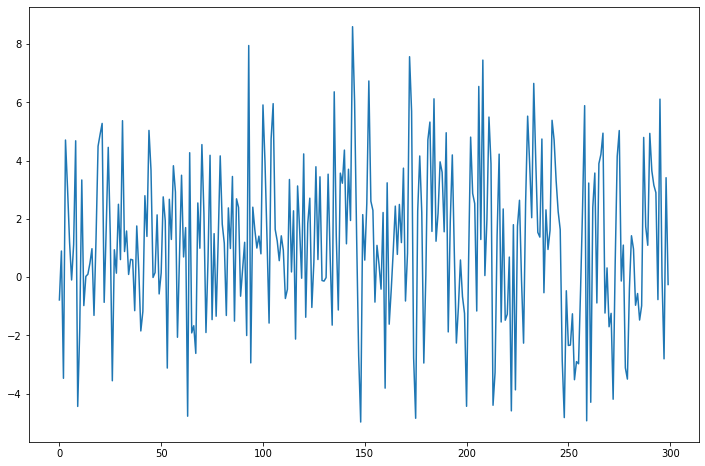

In [14]:
# Note the characteristics of stationary data on the plot
plt.figure(figsize=(12,8))
plt.plot(np.random.normal(1, 3, 300))

In [15]:
# Test application on a vector of numbers
mydata = (3, 5, 3, 65, 64, 64, 65, 643, 546, 546, 544)

stationarity_test(mydata)

Results of Dickey-Fuller Test:
Test Statistic                 42.200457
p-value                         1.000000
#Lags Used                      3.000000
Number of Observations Used     7.000000
dtype: float64


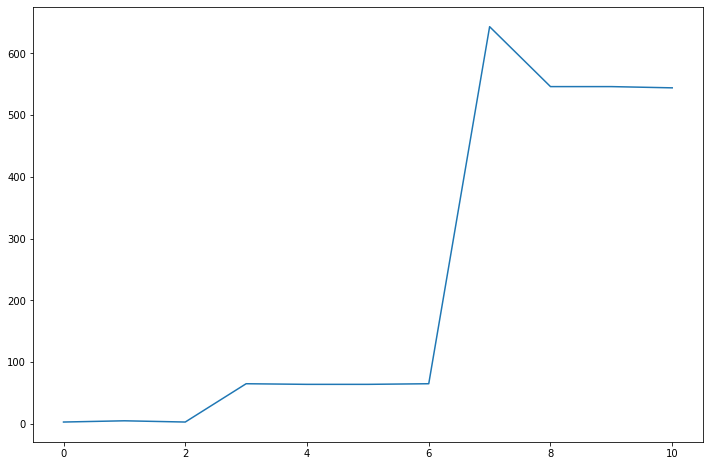

In [16]:
# Note the three levels in the data
plt.figure(figsize=(12,8))
plt.plot(mydata)

## Autocorrelation

In [18]:
# Classic ACF and PACF Plots for Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

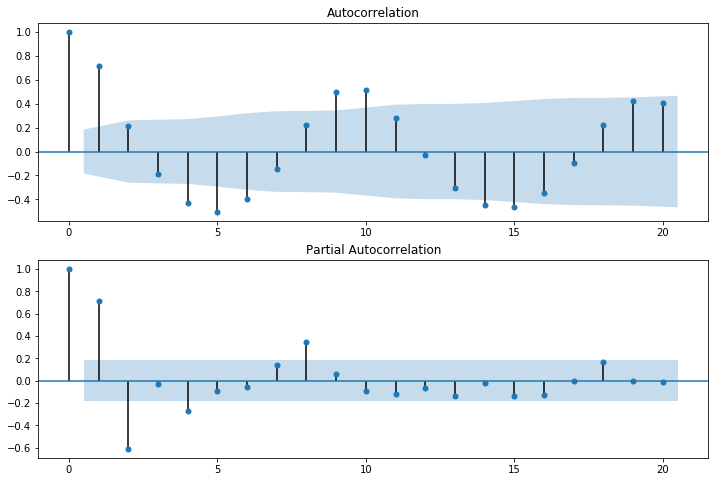

In [19]:
# Autocorrelation and partical autocorrelation in the Lynx dataset
# Two plots on one sheet
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mylynxts, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mylynxts, lags=20, ax=ax2)

## Visualizing Time Series in Python

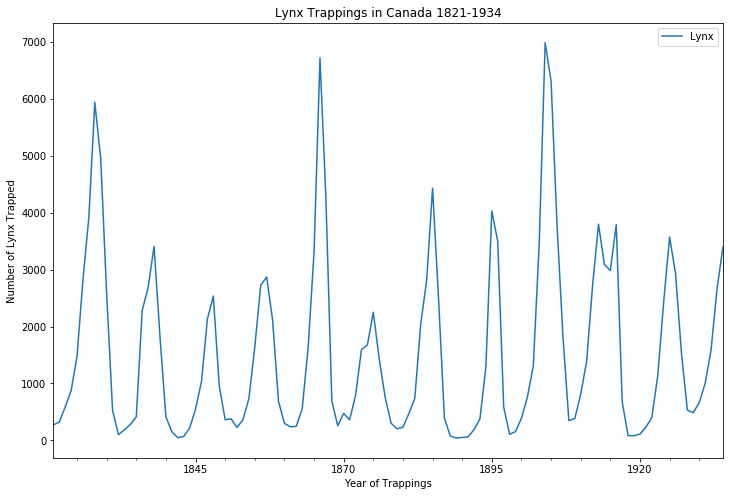

In [20]:
# Visualizing Time Series in Python
# Line graph with matplotlib pyplot module
plt.figure(figsize=(12,8))
mylynxts.plot()
plt.title('Lynx Trappings in Canada 1821-1934')
plt.xlabel('Year of Trappings')
plt.ylabel('Number of Lynx Trapped')
plt.legend(['Lynx'])

In [21]:
# Plotting two series on the same plot
# Getting the cumsum of mylynxts
# Series object, therefore the index is inherited
cumsum_lynx = np.cumsum(mylynxts)

In [22]:
cumsum_lynx.head()

1821-12-31     269
1822-12-31     590
1823-12-31    1175
1824-12-31    2046
1825-12-31    3521
Freq: A-DEC, dtype: int64

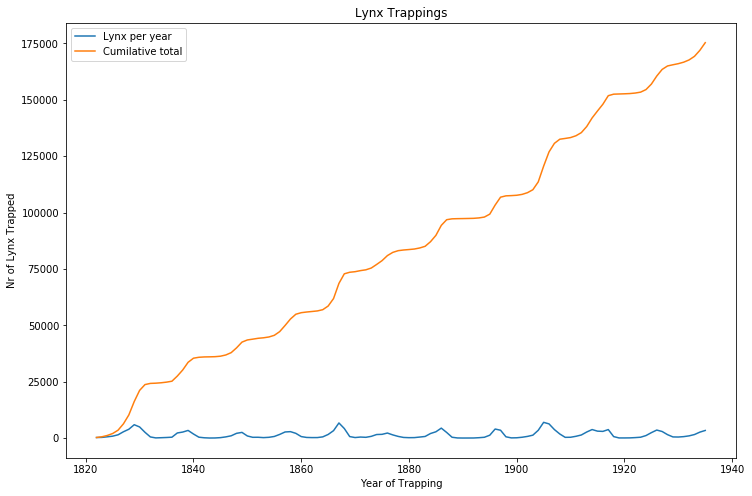

In [23]:
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(cumsum_lynx)
plt.title('Lynx Trappings')
plt.xlabel('Year of Trapping')
plt.ylabel('Nr of Lynx Trapped')
plt.legend(['Lynx per year', 'Cumilative total'])

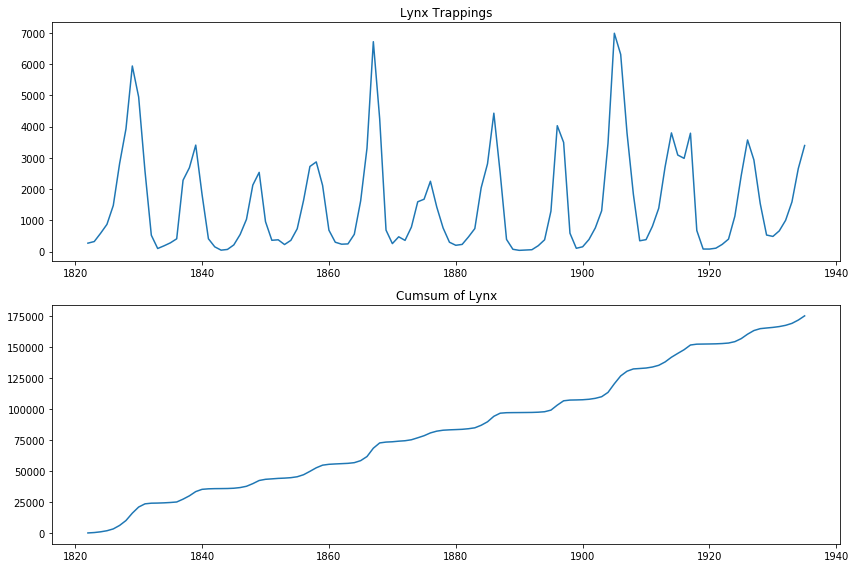

In [24]:
# Getting two visualizations in the same output cell
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(mylynxts)
plt.title('Lynx Trappings')

plt.subplot(2,1,2)
plt.plot(cumsum_lynx)
plt.title('Cumsum of Lynx')
plt.tight_layout()

###   Rolling Calculations (Simple) for the Mean and Standard Deviation 

In [25]:
# Simple moving (rolling) calculations
def plot_rolling(timeseries, window):
    rol_mean = timeseries.rolling(window).mean()
    rol_std = timeseries.rolling(window).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
    std = plt.plot(rol_std, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.show()

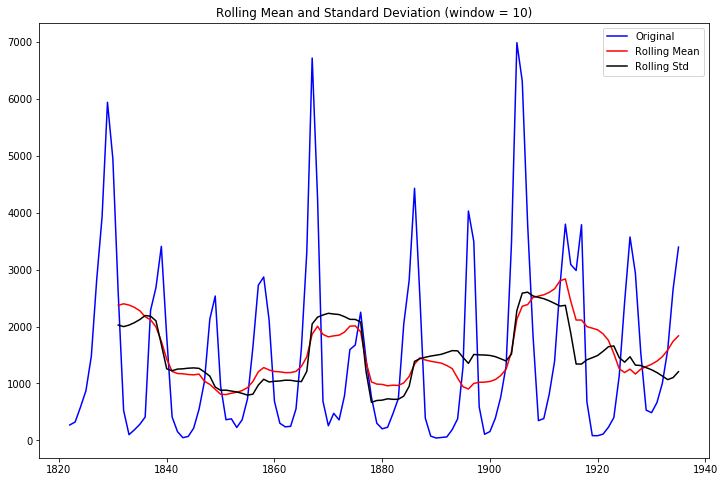

In [26]:
plot_rolling(mylynxts,10)

In [30]:
# The smoothed values for the calculated means
mylynxts.rolling(10).mean()

1821-12-31       NaN
1822-12-31       NaN
1823-12-31       NaN
1824-12-31       NaN
1825-12-31       NaN
               ...  
1930-12-31    1391.4
1931-12-31    1468.5
1932-12-31    1587.6
1933-12-31    1740.1
1934-12-31    1836.5
Freq: A-DEC, Length: 114, dtype: float64

In the graph above the mean value starts from only the tenth day which is understandable given that the averaging starts from there. But say we wish to see an extended trend from the start of the series. The below code does that. The idea is that upto the window that we have supplied (in the below case 30) the averaging will be taking place within two values. Like for t,t+1 till we reach the 30th value and from there it takes the averaging for the past 30 values. It should be noted this could initially lead to turbulence and smoothing would be worse

In [28]:
# Simple rolling calculation with minimum number of periods
def plot_rolling2(timeseries, window):
    rol_mean = timeseries.rolling(window, min_periods = 1).mean()
    rol_std = timeseries.rolling(window, min_periods = 1).std()
    
    fig = plt.figure(figsize = (12, 8))
    og = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rol_mean, color = "red", label = "Rolling Mean")
    std = plt.plot(rol_std, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation (window = "+str(window)+")")
    plt.show()

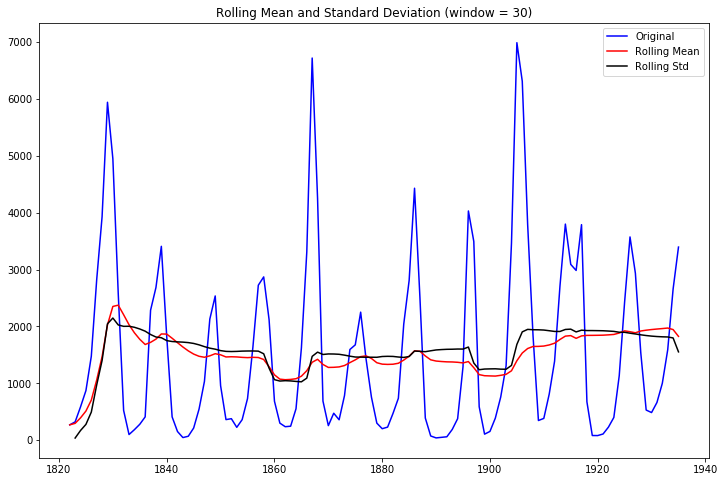

In [29]:
# No NA values, but shorter window size
plot_rolling2(mylynxts, 30)

In [31]:
# Getting the smooth values only - minimum periods = 1
mylynxts.rolling(30, min_periods = 1).mean()

1821-12-31     269.000000
1822-12-31     295.000000
1823-12-31     391.666667
1824-12-31     511.500000
1825-12-31     704.200000
                 ...     
1930-12-31    1954.100000
1931-12-31    1962.166667
1932-12-31    1971.600000
1933-12-31    1944.666667
1934-12-31    1824.833333
Freq: A-DEC, Length: 114, dtype: float64

### Exponentially Weighted Moving Average

The weighting for each older data decreases exponentially, never reaching zero. Therefore the older data would have less weight and the more recent data would be given more importance

In [32]:
def plot_ewma(timeseries, alpha):
    expw_ma = timeseries.ewm(alpha=alpha).mean()

    fig = plt.figure(figsize = (12, 8))
    og_line = plt.plot(timeseries, color = "blue", label = "Original")
    exwm_line = plt.plot(expw_ma, color = "red", label = "EWMA")
    plt.legend(loc = "best")
    plt.title("EWMA (alpha= "+str(alpha)+")")
    plt.show()

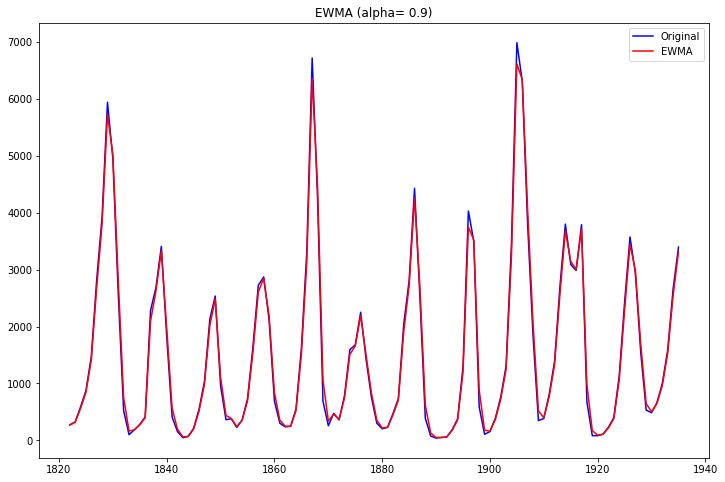

In [33]:
plot_ewma(mylynxts, 0.9)

# ARIMA Models in Python

In [9]:
# ARIMA Parameter Selection
# Note the date format (DatetimeIndex + tuple), it is required for the ARIMA function we use below
mylynxts = pd.Series(mylynx_df['trappings'].values,
                 index = pd.DatetimeIndex(data = (tuple(pd.date_range('31/12/1821',
                                                                      periods = 114,
                                                                      freq = 'A-DEC'))),
                                          freq = 'A-DEC'))

In [35]:
mylynxts

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
              ... 
1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, Length: 114, dtype: int64

### Test for stationarity - Parameter d

In [36]:
# Applying the Augmented Dickey-Fuller test function we created in the previous section
stationarity_test(mylynxts)

Results of Dickey-Fuller Test:
Test Statistic                  -2.996304
p-value                          0.035241
#Lags Used                       7.000000
Number of Observations Used    106.000000
dtype: float64


From the p value output in the above section we can see that it is less than the threshold and therefore we can conclude that the there is no stationary and the null hypothesis can be rejected. Since there is no stationarity therefore we can put the "I" term into zero

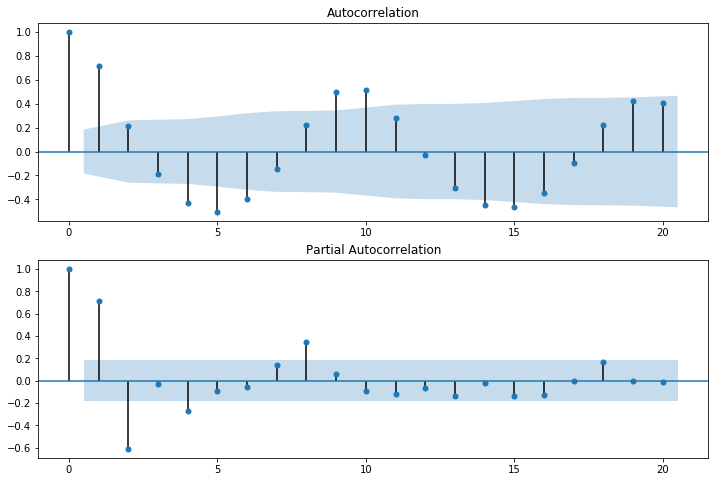

In [37]:
# Tests for autocorrelation and partical autocorrelation - Parameters p, q
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(mylynxts, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(mylynxts, lags=20, ax=ax2)

From the above plot what we can learn is that Partial Autocorrelation (Autoregression) plot has two terms for the that are in the lag and that which significant.  Whereas in autocorrleation plot (Moving Average) there are multiple terms and therefore we shall start with Parial correlation plot and use a lag value of 2 as the first parameter and keep the other paramters as zero. We can iterate and change the parameters and see to improve the predictions 

In [38]:
# ARIMA Model Setup
from statsmodels.tsa.arima_model import ARIMA

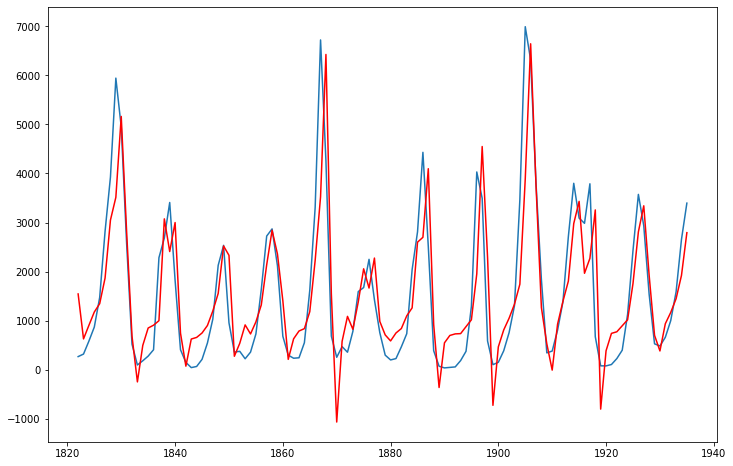

In [39]:
# Using ARIMA for the model, with the argument 'order'
# It is easy to change parameters
model = ARIMA(mylynxts, order=(2, 0, 0))   ## Keeping the first parameters as 2 and the rest as 0
results_AR = model.fit()
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(results_AR.fittedvalues, color='red')

In [40]:
# Model Diagnostics
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(2, 0)   Log Likelihood                -935.016
Method:                       css-mle   S.D. of innovations            876.447
Date:                Sun, 12 Jul 2020   AIC                           1878.032
Time:                        23:40:20   BIC                           1888.977
Sample:                    12-31-1821   HQIC                          1882.474
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1545.4910    181.672      8.507      0.000    1189.421    1901.561
ar.L1.y        1.1474      0.074     15.459      0.000       1.002       1.293
ar.L2.y       -0.5998      0.074     -8.110      0.000      -0.745      -0.455
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9566           -0.8673j            1.2913           -0.1172
AR.2            0.9566           +0.8673j            1.2913            0.1172
-----------------------------------------------------------------------------
"""

The objective of the summary is to understand the performance of the current model and then change the parameters to see if the performance improves. The performance can be judged by the Information Criteria and the Residual plots. In the above tabular results the AIC (Akaike information criterion)is the criteria I shall be  using to judge the model. The lower the value the better is the model performing. Let us also take a look at the residual value of the plot

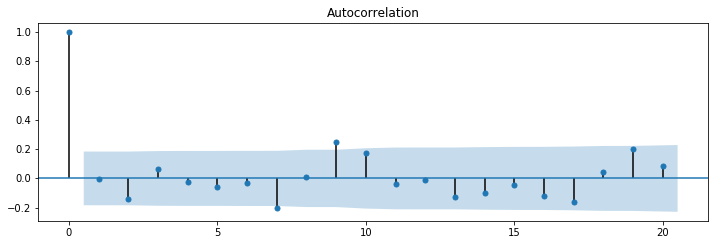

In [41]:
# ACF on Residuals of Our Model
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR.resid, lags=20, ax=ax1)

The purpose of the residual plot is with the idea that the residuasls should only have the the randomness in them and all the
patterns should be captured in the model. Therefore there should be no autocorrelation in the residual model. Also the plot below shows us that of the residuals plotted keeping in mind of that of a histogram and we would ideally like to see this in a normally distributed curve. However we can see that the peak for the normally distributed curve is differnt when compated to that of the histograms bins where the heavily concentrated bins is to the left.

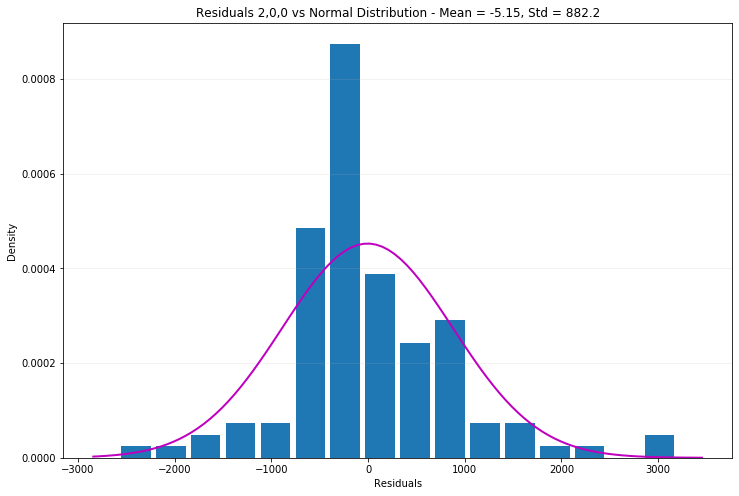

In [42]:
# Histogram of the Residuals
# Importing function for normal distribution
from scipy.stats import norm

plt.figure(figsize = (12, 8))
plt.hist(results_AR.resid, bins = 'auto', density = True, rwidth = 0.85,
         label = 'Residuals') #density TRUE - norm.dist bell curve
mu, std = norm.fit(results_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over a specified interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, 'm', linewidth = 2)
plt.grid(axis='y', alpha = 0.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals 2,0,0 vs Normal Distribution - Mean = '+str(round(mu,2))+', Std = '+str(round(std,2)))
plt.show()

### Trying the same procedure with the intial parameter value = 4

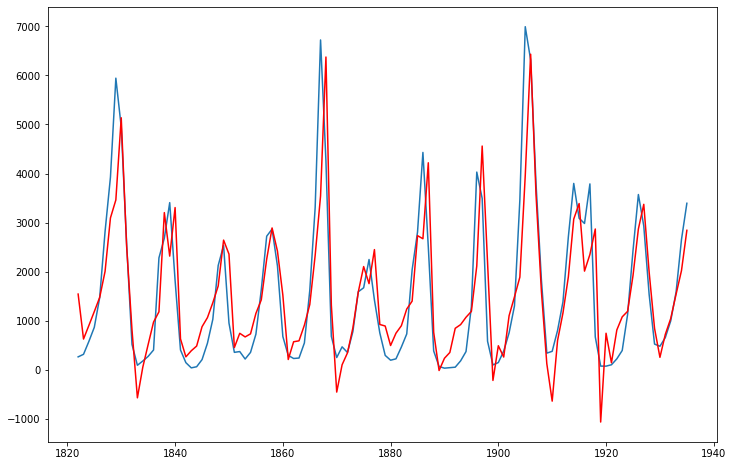

In [43]:
# Using ARIMA for the model, with the argument 'order'
# It is easy to change parameters
model = ARIMA(mylynxts, order=(4, 0, 0))   ## Keeping the first parameters as 2 and the rest as 0
results_AR = model.fit()
plt.figure(figsize=(12,8))
plt.plot(mylynxts)
plt.plot(results_AR.fittedvalues, color='red')

In [44]:
# Model Diagnostics
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(4, 0)   Log Likelihood                -931.111
Method:                       css-mle   S.D. of innovations            845.949
Date:                Sun, 12 Jul 2020   AIC                           1874.222
Time:                        23:56:04   BIC                           1890.639
Sample:                    12-31-1821   HQIC                          1880.885
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1547.1845    136.850     11.306      0.000    1278.963    1815.406
ar.L1.y        1.1246      0.090     12.450      0.000       0.948       1.302
ar.L2.y       -0.7174      0.137     -5.250      0.000      -0.985      -0.450
ar.L3.y        0.2634      0.136      1.935      0.053      -0.003       0.530
ar.L4.y       -0.2543      0.090     -2.837      0.005      -0.430      -0.079
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9198           -0.6880j            1.1486           -0.1022
AR.2            0.9198           +0.6880j            1.1486            0.1022
AR.3           -0.4020           -1.6789j            1.7264           -0.2874
AR.4           -0.4020           +1.6789j            1.7264            0.2874
-----------------------------------------------------------------------------
"""

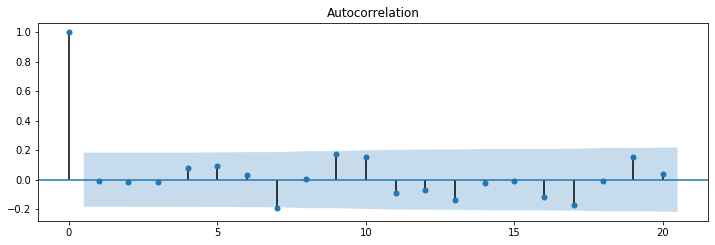

In [45]:
# ACF on Residuals of Our Model
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR.resid, lags=20, ax=ax1)

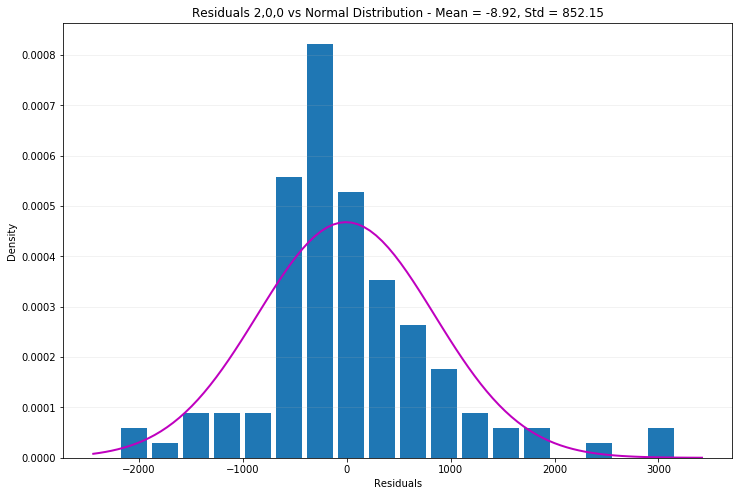

In [46]:
# Histogram of the Residuals
# Importing function for normal distribution
from scipy.stats import norm

plt.figure(figsize = (12, 8))
plt.hist(results_AR.resid, bins = 'auto', density = True, rwidth = 0.85,
         label = 'Residuals') #density TRUE - norm.dist bell curve
mu, std = norm.fit(results_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over a specified interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, 'm', linewidth = 2)
plt.grid(axis='y', alpha = 0.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals 2,0,0 vs Normal Distribution - Mean = '+str(round(mu,2))+', Std = '+str(round(std,2)))
plt.show()

We have to try by trial and error as to see which values bring the AIC value down and makes sure there is no autocorrelation in the the residuals and that the residuals have a normal distribution. It seems that a value of 4 seems ideal as 3 and 5 seems to increase the value of AIC

In [47]:
# Checking the Residuals: A Close Look
# Example performed on an AR2 model
model = ARIMA(mylynxts, order=(2, 0, 0))  
results_AR = model.fit()

In [48]:
# The last 5 observations for the original data, the fitted values and the residuals
mylynxts.tail()

1930-12-31     662
1931-12-31    1000
1932-12-31    1590
1933-12-31    2657
1934-12-31    3396
Freq: A-DEC, dtype: int64

In [49]:
results_AR.fittedvalues.tail()

1930-12-31     938.285581
1931-12-31    1167.771182
1932-12-31    1449.449162
1933-12-31    1923.721483
1934-12-31    2794.184283
Freq: A-DEC, dtype: float64

In [50]:
results_AR.resid.tail()

1930-12-31   -276.285581
1931-12-31   -167.771182
1932-12-31    140.550838
1933-12-31    733.278517
1934-12-31    601.815717
Freq: A-DEC, dtype: float64

In [51]:
# The mean of the residuals
np.mean(results_AR.resid) ## Preferred close to be to zero

-5.154447201472496

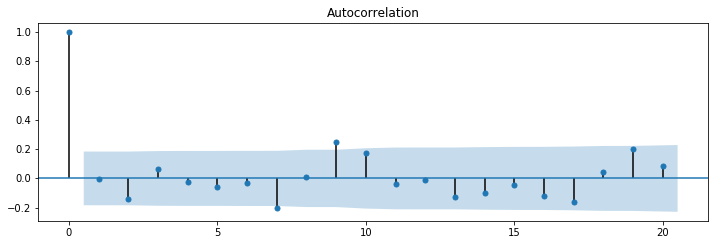

In [52]:
# The ACF Plot
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(results_AR.resid, lags=20, ax=ax1)

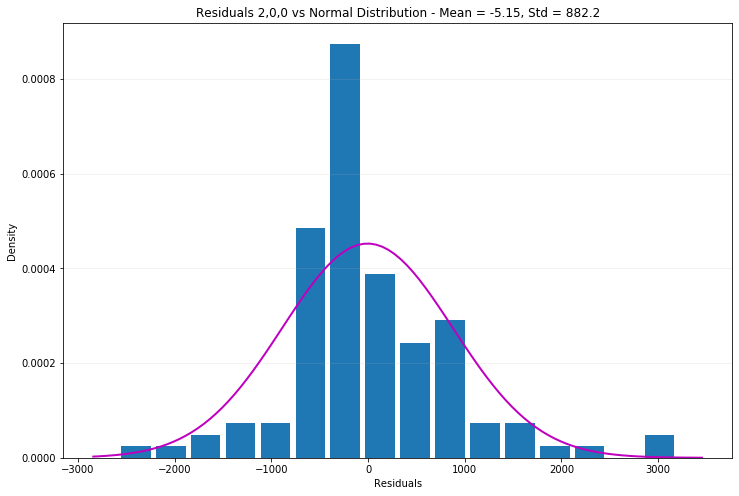

In [53]:
# Histogram on the residuals

plt.figure(figsize = (12, 8))
plt.hist(results_AR.resid, bins = 'auto', density = True, rwidth = 0.85, label = 'Residuals') #density TRUE - norm.dist bell curve
mu, std = norm.fit(results_AR.resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100) #linspace returns evenly spaced numbers over a specified interval
p = norm.pdf(x, mu, std) #pdf = probability density function
plt.plot(x, p, 'm', linewidth = 2)
plt.grid(axis='y', alpha = 0.2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals 2,0,0 vs Normal Distribution - Mean = '+str(round(mu,2))+', Std = '+str(round(std,2)))
plt.show()

# ARIMA forecasts

In [54]:
# Setting up an ARIMA(4,0,0) model and storing its fitted values
model_AR4 = ARIMA(mylynxts, order=(4, 0, 0))  
results_AR4 = model_AR4.fit()

In [55]:
# Forecast based on the ARIMA(4,0,0) model
Fcast400 = results_AR4.predict(start = '31/12/1935',
                               end = '31/12/1945')

In [56]:
# For the comparison, let's set up another model
# Arima(2,0,2) model and its fitted values
model202 = ARIMA(mylynxts, order=(2, 0, 2))  
results_M202 = model202.fit()

In [57]:
# Forecast based on the ARIMA(2,0,2) model
Fcast202 = results_M202.predict(start = '31/12/1935',
                                end = '31/12/1945')

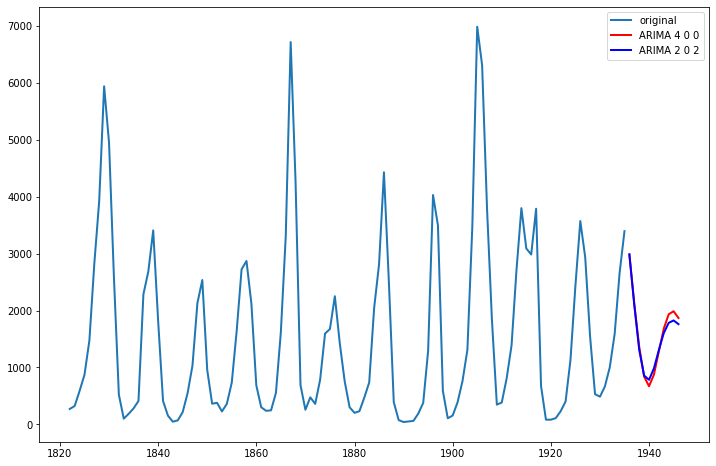

In [58]:
# Comparing the forecasts via data visualization
plt.figure(figsize = (12, 8))
plt.plot(mylynxts, linewidth = 2, label = "original")
plt.plot(Fcast400, color='red', linewidth = 2,
         label = "ARIMA 4 0 0")
plt.plot(Fcast202, color='blue', linewidth = 2,
         label = "ARIMA 2 0 2")
plt.legend()

# Models for Seasonal Data

A given time series is thought to consist of three systematic components including level, trend, seasonality, and one non-systematic component called noise.

These components are defined as follows:

- Level: The average value in the series.

- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

## Additive Model

y(t) = Level + Trend + Seasonality + Noise

- An additive model is linear where changes over time are consistently made by the same amount.
- A linear trend is a straight line.
- A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

## Multiplicative Model

y(t) = Level*Trend*Seasonality* Noise

- A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.
- A nonlinear trend is a curved line.
- A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

## Decomposition as a Tool

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem. It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

## Automatic Time Series Decomposition

The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). It requires that you specify whether the model is additive or multiplicative.



In [10]:
# Importing the 'nottem' dataset as a pandas DataFrame
# Make sure that nottem.csv is in the same folder as this python notebook
nottem = pd.read_csv("nottem.csv", header = 0, parse_dates = [0], names = ['Month', 'Temp'], index_col = 0)
print(nottem)

       Temp
Month      
1      40.6
2      40.8
3      44.4
4      46.7
5      54.1
...     ...
236    61.8
237    58.2
238    46.7
239    46.6
240    37.8

[240 rows x 1 columns]


In [14]:
# Conversion to a pandas Series object
nottemts = pd.Series((nottem.Temp).values,
                     index = pd.date_range('1920-01-31',
                                           periods = 240,
                                           freq = 'M'))

The first method to see the seasonal trends in a univariate seasonal dataset is by using the seasonal_decompose and this splits the data into three parts. The trend observed, the seasonality and the white noise. We shall see this in the below plot. As we can see in the below plot there is a clear seasonality in the data. The trend however is not clear

In [15]:
# Seasonal Decomposition
# Simple seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(nottemts)

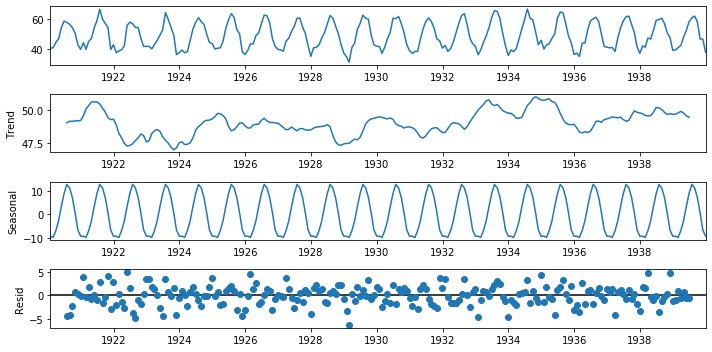

In [16]:
plt.rcParams["figure.figsize"] = [10, 5]
dplot = decomposed.plot()

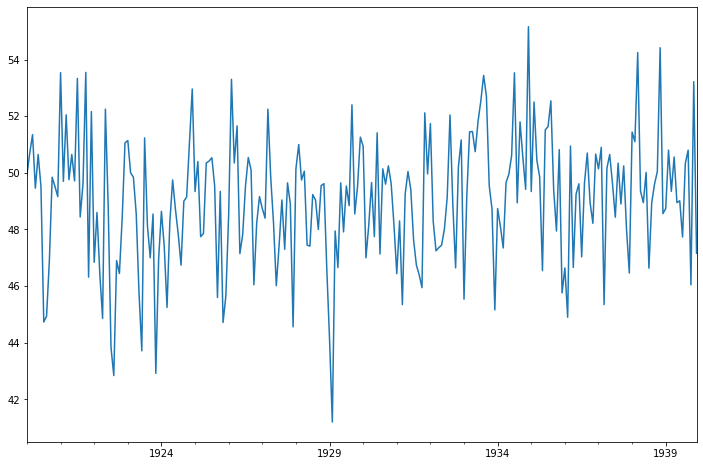

In [17]:
# Seasonal Adjustment and Forecasting
nottemadjusted = nottemts - decomposed.seasonal
plt.figure(figsize=(12,8))
nottemadjusted.plot()

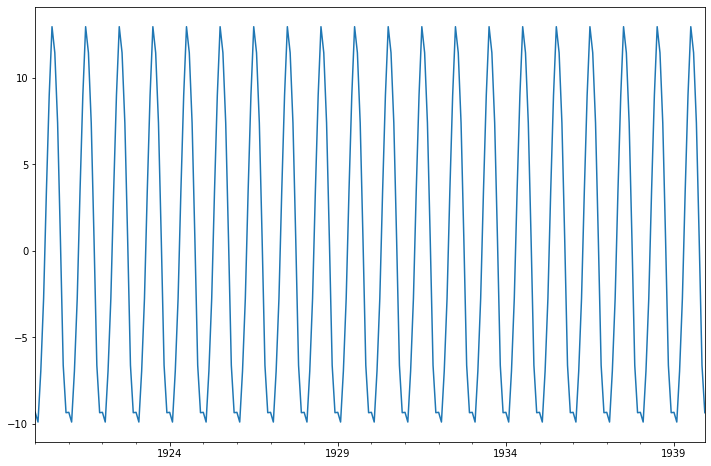

In [19]:
# Getting the seasonal component only
plt.figure(figsize=(12,8))
decomposed.seasonal.plot()

# Exponential Smoothing model for Seasonal Dataset

The differnce between Holt and Holt Winters is that Holt Winters has an additional term for smoothing seasonality. We can see that in the below parameters

Smoothing_Level:
The alpha value is for that of that of the simple exponential smoothing.

Smoothing_slope:(trend)
The beta value of the holts trend method

Smooothing seasonal: 
The gamma value( This is the main difference between Holts and Holts Winters)

Damping coeffcient: Decides whether the trend keeps increasing or flatterns

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
help(ExponentialSmoothing)

Help on class ExponentialSmoothing in module statsmodels.tsa.holtwinters:

class ExponentialSmoothing(statsmodels.tsa.base.tsa_model.TimeSeriesModel)
 |  ExponentialSmoothing(endog, trend=None, damped=False, seasonal=None, seasonal_periods=None, dates=None, freq=None, missing='none')
 |  
 |  Holt Winter's Exponential Smoothing
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      Time series
 |  trend : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of trend component.
 |  damped : bool, optional
 |      Should the trend component be damped.
 |  seasonal : {"add", "mul", "additive", "multiplicative", None}, optional
 |      Type of seasonal component.
 |  seasonal_periods : int, optional
 |      The number of periods in a complete seasonal cycle, e.g., 4 for
 |      quarterly data or 7 for daily data with a weekly cycle.
 |  
 |  Returns
 |  -------
 |  results : ExponentialSmoothing class
 |  
 |  Notes
 |  -----
 |  This is a full implementatio

In [23]:
# Setting up the exponential smoothing model (A,N,A)
expsmodel = ExponentialSmoothing(nottemts, seasonal = "additive",
                                 seasonal_periods = 12)

In [24]:
# Fit model
expsmodelfit = expsmodel.fit()

C:\Users\kuria\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\kuria\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [25]:
# Alpha smoothing coefficient
expsmodelfit.params['smoothing_level']

0.031012728281151054

In [26]:
# Gamma smoothing coefficient
expsmodelfit.params['smoothing_seasonal']

0.0

In [27]:
# Prediction with exponential smoothing
expsfcast = expsmodelfit.predict(start = 240, end = 251)

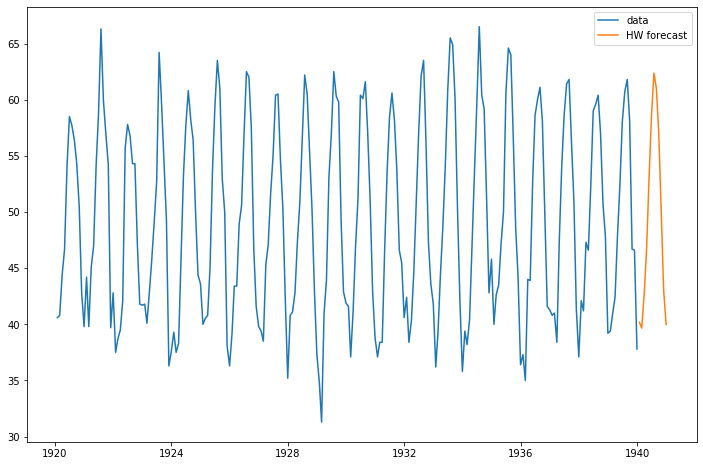

In [29]:
# Plotting the predictied values and the original data
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(expsfcast, label='HW forecast')
# plt.xlim('1920','1941'); plt.ylim(30,70);
plt.legend()

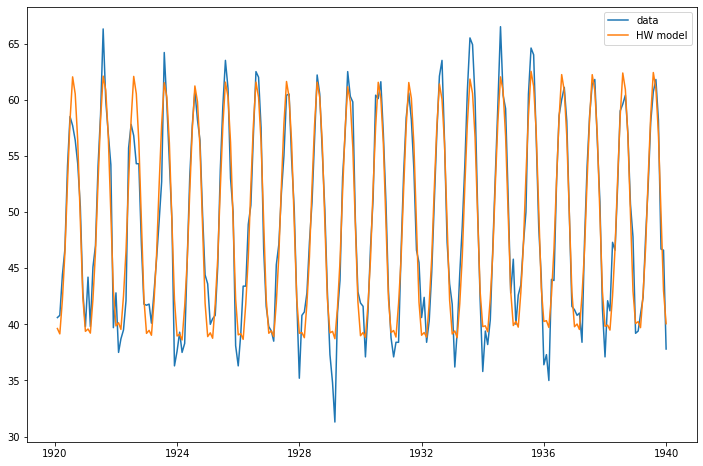

In [31]:
# Comparing the model to the original values
# How good is the model fit?
plt.figure(figsize=(12,8))
plt.plot(nottemts, label='data')
plt.plot(expsmodelfit.fittedvalues, label='HW model')
# plt.xlim('1920','1940'); plt.ylim(30,70);
plt.legend()

##  Modeling Seasonal Data with Prophet by Facebook (an introduction)

In [21]:
# Import the function 'Prophet' from the library 'fbprophet'
from fbprophet import Prophet

In [22]:
nottemts.head()

1920-01-31    40.6
1920-02-29    40.8
1920-03-31    44.4
1920-04-30    46.7
1920-05-31    54.1
Freq: M, dtype: float64

In [23]:
# Create a pandas.DataFrame with the values of nottemts
nottem_df = pd.DataFrame({'ds':nottemts.index, 
                          'y':nottemts.values})

In [24]:
nottem_df.head()

,ds,y
0,1920-01-31,40.6
1,1920-02-29,40.8
2,1920-03-31,44.4
3,1920-04-30,46.7
4,1920-05-31,54.1


In [25]:
# Make the prophet model and fit on the data
mymodel = Prophet()
mymodel.fit(nottem_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kuria\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [26]:
# Create a forecast with 'mymodel'
future_data = mymodel.make_future_dataframe(periods = 12,
                                            freq = 'm')

fcast = mymodel.predict(future_data)

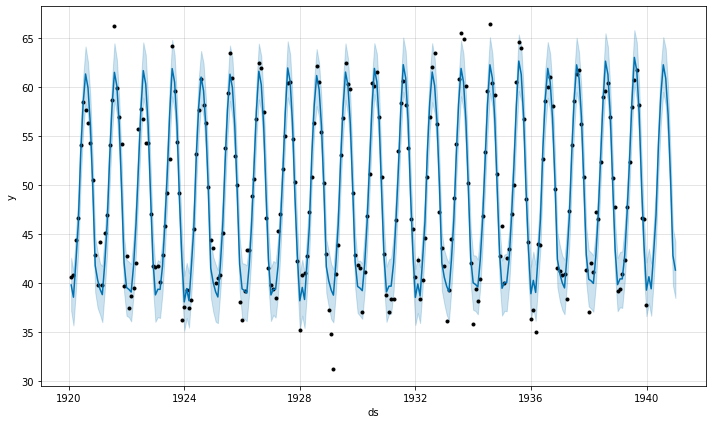

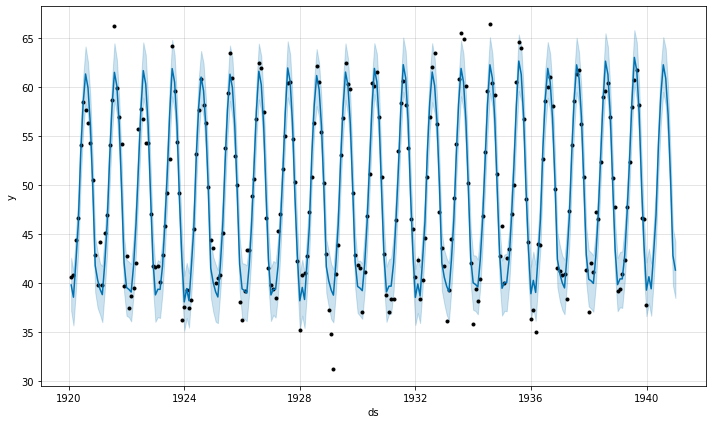

In [27]:
mymodel.plot(fcast)